# Data analysis: Dow Jones stock prices over time

Data analysis of Dow Jones stock prices dataset from:

http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Setup

In [2]:
plt.style.use("ggplot")

## Read and clean data

### Read CSV

In [3]:
df = pd.read_csv("dow_jones_index.data")

### Examine results

In [4]:
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [5]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

### Convert date column to date datatype

In [6]:
df.head(1)["date"]

0    1/7/2011
Name: date, dtype: object

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.head(1)["date"]

0   2011-01-07
Name: date, dtype: datetime64[ns]

In [9]:
df.dtypes

quarter                                        int64
stock                                         object
date                                  datetime64[ns]
open                                          object
high                                          object
low                                           object
close                                         object
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                               object
next_weeks_close                              object
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

### Convert prices in dollars to floats

In [10]:
def parse_dollar_price(dollar_price):
    return np.float64(dollar_price[1:]) if dollar_price[0] == '$' else np.NaN

dollars_cols = ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]
df[dollars_cols] = df[dollars_cols].map(parse_dollar_price)

In [11]:
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [12]:
df.dtypes

quarter                                        int64
stock                                         object
date                                  datetime64[ns]
open                                         float64
high                                         float64
low                                          float64
close                                        float64
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                              float64
next_weeks_close                             float64
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

## Analyze and plot

In [13]:
df.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.63831,12,0.189994


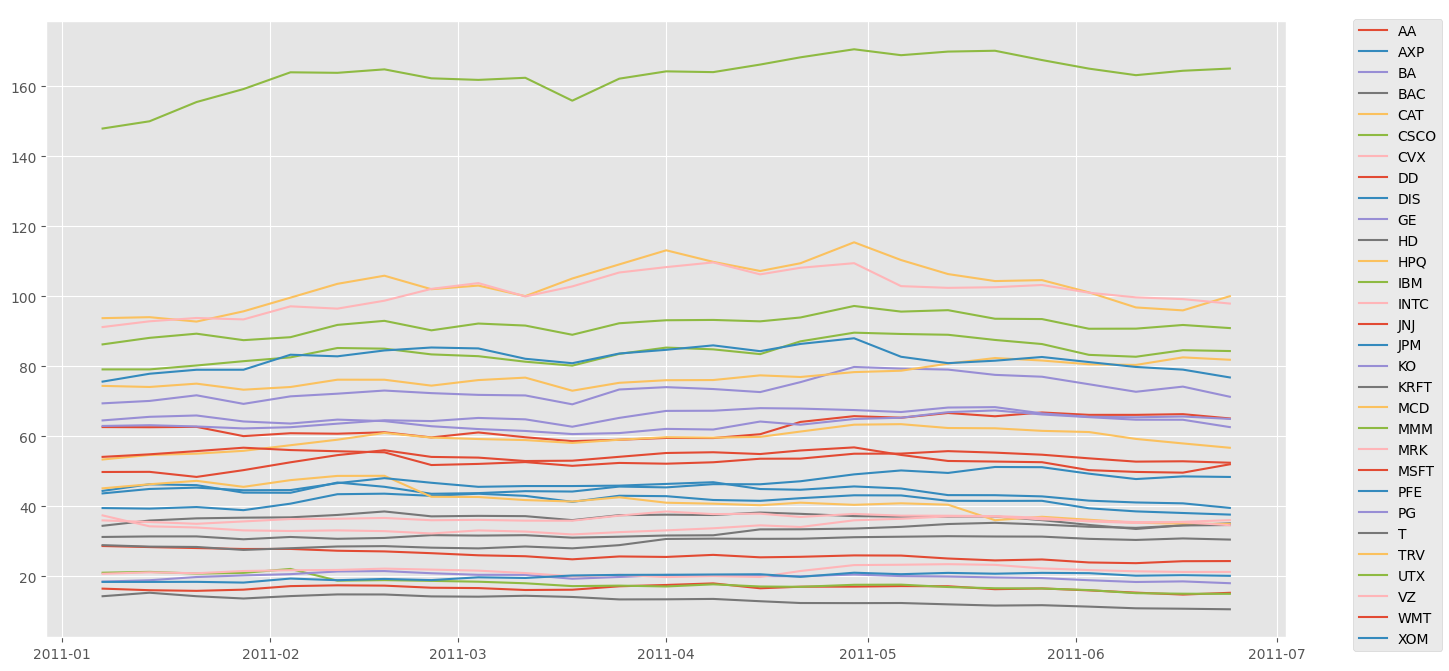

In [14]:
def plot(w, h):
    fig, ax = plt.subplots()
    fig.set_size_inches(w, h)

    for stock, stock_df in df.groupby("stock"):
        ax.plot(stock_df["date"], stock_df["close"], label=stock)

    fig.legend(loc='center right')

plot(16, 8)

In [15]:
df[["stock", "close"]].groupby("stock").agg(
    p1=("close", lambda s: s.quantile(0.01)),
    p5=("close", lambda s: s.quantile(0.05)),
    p25=("close", lambda s: s.quantile(0.25)),
    p50=("close", lambda s: s.quantile(0.5)),
    p75=("close", lambda s: s.quantile(0.75)),
    p95=("close", lambda s: s.quantile(0.95)),
    p99=("close", lambda s: s.quantile(0.99))
).sort_values(by="p50", ascending=False).head(5)

,p1,p5,p25,p50,p75,p95,p99
stock,,,,,,,
IBM,148.4268,151.100,162.18,164.05,166.21,170.112,170.4792
CAT,92.9852,93.786,99.59,103.54,107.21,112.564,114.8604
CVX,91.5836,92.938,97.90,102.10,103.75,109.216,109.6072
MMM,86.5204,87.572,90.25,91.80,93.22,95.928,96.9220
UTX,79.0800,79.296,82.52,83.52,85.32,89.164,89.4912
